In [1]:
import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:

H4_bc = "TGTATCAGTT"
H3K4me3_bc = "GTAGTGGCAT"
H3K27ac_bc = "GTTATTAGGC"
H3K27me3_bc = "TAACATGCGG"
EZH2_bc = "TGGCTAATGT"
EGFR_bc = "TGACCTTATG"
HAtag_bc = "GATTGTCCGC"
H3K27M_bc = "CACGATTGTT"
AEBP2_bc = "TTGCATGGTA"
EED_bc = "TTGAGTAACC"
SUZ12_bc = "TGAGTCGATT"
MED12_bc = "CTATGTTGGT"
CycC_bc = "GAGGATAAGT"

All12_pool = [
    H3K4me3_bc, 
    H3K27ac_bc, 
    H3K27me3_bc, EZH2_bc, EED_bc, SUZ12_bc, AEBP2_bc, 
    MED12_bc, CycC_bc, 
    H3K27M_bc,
    EGFR_bc, HAtag_bc
]

bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

XmnI_midseq = "TAGAGAAG"

/tmp/ipykernel_52785/580941125.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels_with_space, ha='right', va = "center", fontsize = 15)
/tmp/ipykernel_52785/580941125.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center', va = "bottom", fontsize = 15)
/tmp/ipykernel_52785/580941125.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axins_top = ax.inset_axes(
/tmp/ipykernel_52785/580941125.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axins_top = ax.inset_axes(
/tmp/ipykernel_52785/580941125.py:103: UserWarning: set_ticklabels() should only be used with a fixed number

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

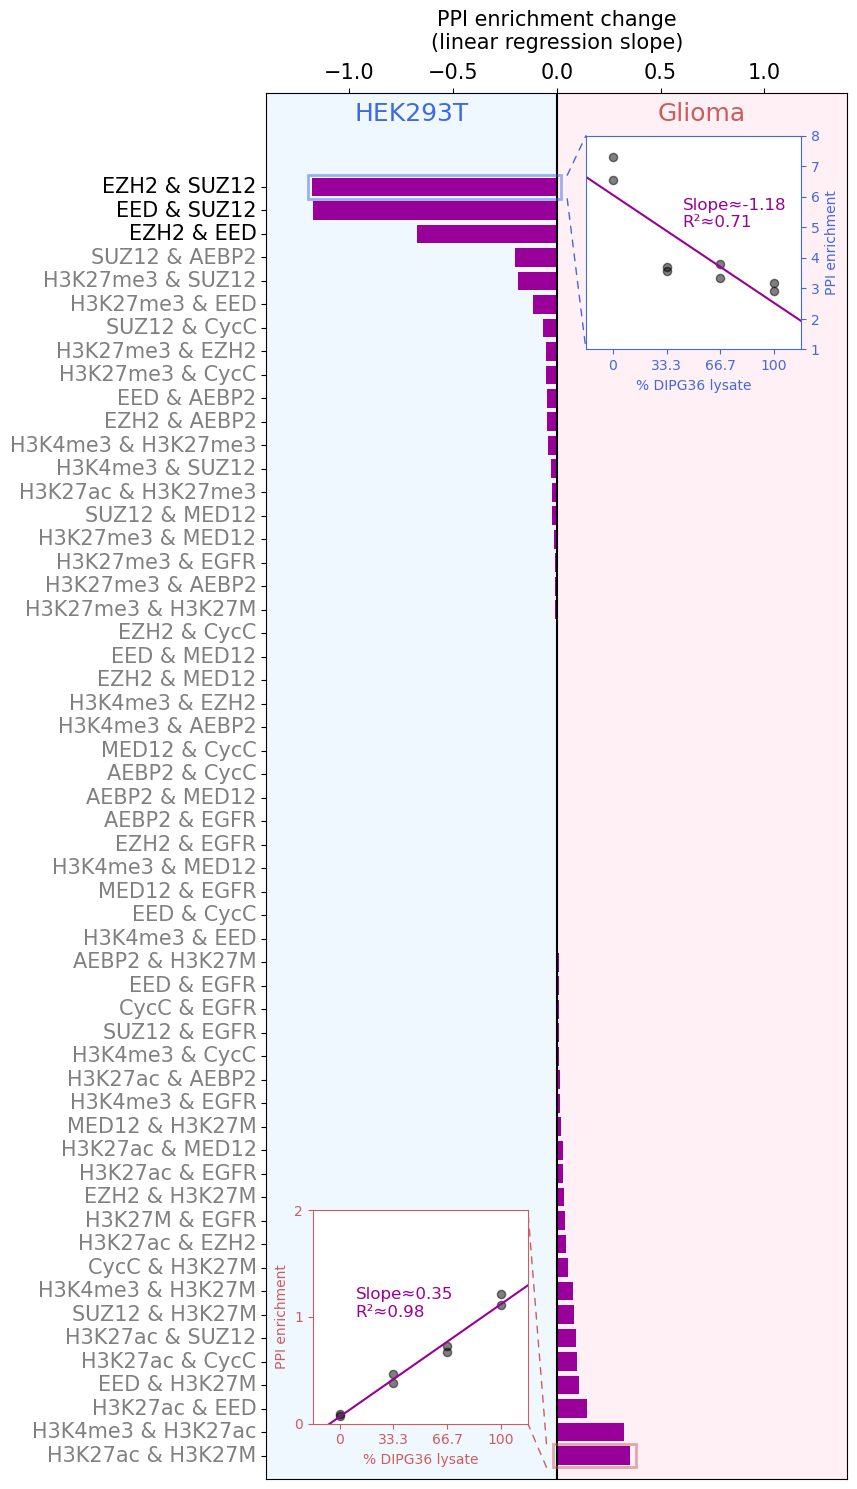

In [3]:
mixing_tsv_path = "/path/to/CellLysateMixing_output.PPIEnrichment.tsv"

mixing_signal_lines = [x.strip().split("\t") for x in (open(mixing_tsv_path).readlines())]
mixing_PPI_nms = (mixing_signal_lines[0])[1:]
mixing_sample_nms = [x[0] for x in mixing_signal_lines[1:]]
mixing_signals = []
for row in mixing_signal_lines[1:]:
    curr_row = [float(x) for x in row[1:]]
    mixing_signals.append([x / curr_row[49] for x in curr_row])

x_vec = [[1], [2], [3], [4], [1], [2], [3], [4]]
betas_vec = []
for idx in range(len(mixing_PPI_nms)):
    
    curr_yvec = [[x[idx]] for x in mixing_signals]
    
    reg = LinearRegression().fit(x_vec, curr_yvec)
    betas_vec.append([mixing_PPI_nms[idx], (reg.coef_)[0], reg.score(x_vec, curr_yvec)])

    if (mixing_PPI_nms[idx] == "EZH2&SUZ12"):
        top_xvec = x_vec
        top_yvec = curr_yvec

    if (mixing_PPI_nms[idx] == "H3K27ac&H3K27M"):
        bot_xvec = x_vec
        bot_yvec = curr_yvec

fig, ax = plt.subplots(figsize = (7.5, 18))
betas_vec.sort(key = lambda x : x[1], reverse = True)

color_vec = []
for idx in range(len(betas_vec)):
    if (abs(betas_vec[idx][1]) > 0.4):
        color_vec.append("black")
    else:
        color_vec.append("grey")


# bar_color_vec = []
# for i in range(len(betas_vec)):
#     bar_color_vec.append((0.6, 0, 0.6, betas_vec[i][2]))
    
rects = ax.barh([x[0] for x in betas_vec], [x[1][0] for x in betas_vec])
# ax.bar_label(rects, labels = ["R\u00B2\u2248" + str(round(x[2], 2)) for x in betas_vec],
#              fontsize = 12)
plt.xlim(-1.4, 1.4)
plt.ylim(-1, 58)
plt.xlabel("PPI enrichment change\n(linear regression slope)", fontsize = 15)
original_y_labels = ax.get_yticklabels()
y_label_split = [x.get_text().split("&") for x in original_y_labels]
y_labels_with_space = [x[0] + " & " + x[1] for x in y_label_split]
ax.set_yticklabels(y_labels_with_space, ha='right', va = "center", fontsize = 15)
for idx in range(len(ax.get_yticklabels())):
    ax.get_yticklabels()[idx].set_color(color_vec[idx])
ax.set_xticklabels(ax.get_xticklabels(), ha='center', va = "bottom", fontsize = 15)

left, right = plt.xlim()
bot, top = plt.ylim()
ax.fill_between([left, 0], [bot, bot], y2 = [58, 58], color = "aliceblue")
ax.fill_between([0, right], [bot, bot], y2 = [58, 58], color = "lavenderblush")
plt.text(-0.7, 56.8, "HEK293T", fontsize = 18, ha = "center", color = "royalblue")
plt.text(0.7, 56.8, "Glioma", fontsize = 18, ha = "center", color = "indianred")
plt.plot([0, 0], [-5, 58], color = "black")

rects = ax.barh([x[0] for x in betas_vec], [x[1][0] for x in betas_vec], color = (0.6, 0, 0.6))
ax.xaxis.tick_top()
ax.xaxis.set_label_coords(0.5, 1.06) 

axins_top = ax.inset_axes(
    [0.55, 0.815, 0.37, 0.37*7.5/18],
    xlim=(-3.3, 0.05), ylim=(53.5, 54.5), xticklabels=[
        "0", "33.3", "66.7", "100"
    ], yticklabels=[str(x) for x in [1, 2, 3, 4, 5, 6, 7, 8]], xticks = [1, 2, 3, 4], yticks = [1, 2, 3, 4, 5, 6, 7, 8])
axins_top.set_xlim([0.5, 4.5])
axins_top.set_ylim([1, 8])
axins_top.yaxis.set_label_position("right")
axins_top.yaxis.tick_right()
ax.indicate_inset((-1.2, 53.5, 1.22, 1), ec = "royalblue", lw = 2)
axins_top.scatter(top_xvec, top_yvec, color = "k", s = 35, alpha = 0.5)
axins_top.tick_params(color='royalblue', labelcolor='royalblue')
for spine in axins_top.spines.values():
    spine.set_edgecolor('royalblue')
axins_top.set_xlabel("% DIPG36 lysate", color = 'royalblue')
axins_top.set_ylabel("PPI enrichment", color = 'royalblue')
reg_top = LinearRegression().fit(top_xvec, top_yvec)
axins_top.plot([0.5, 4.5], [0.5 * (reg_top.coef_)[0] + reg_top.intercept_, 4.5 * (reg_top.coef_)[0] + reg_top.intercept_],
              color = (0.6, 0, 0.6))
axins_top.text(2.3, 5,
               "Slope\u2248" + str(round(reg_top.coef_[0][0], 2)) + "\n" + "R\u00B2\u2248" + str(round(reg_top.score(top_xvec, top_yvec), 2)),
              color = (0.6, 0, 0.6), fontsize = 12)
con1 = ConnectionPatch(xyA = (0.05, 54.5), coordsA=ax.transData, axesA = ax,
                      xyB = (0, 1), coordsB="axes fraction", axesB = axins_top,
                      color="royalblue", linewidth=1, ls = (0, (5, 5)))
con2 = ConnectionPatch(xyA = (0.05, 53.5), coordsA=ax.transData, axesA = ax,
                      xyB = (0, 0), coordsB="axes fraction", axesB = axins_top,
                      color="royalblue", linewidth=1, ls = (0, (5, 5)))
ax.add_artist(con1)
ax.add_artist(con2)




axins_bot = ax.inset_axes(
    [0.08, 0.04, 0.37, 0.37*7.5/18],
    xlim=(-0.05, 2.5), ylim=(53.5, 54.5), xticklabels=[
        "0", "33.3", "66.7", "100"
    ], yticklabels=[str(x) for x in [0, 1, 2]], xticks = [1, 2, 3, 4], yticks = [0, 1, 2])
axins_bot.set_xlim([0.5, 4.5])
axins_bot.set_ylim([0, 2])
ax.indicate_inset((-0.02, -0.5, 0.4, 1), ec = "indianred", lw = 2)
axins_bot.scatter(bot_xvec, bot_yvec, color = "k", s = 35, alpha = 0.5)
axins_bot.tick_params(color='indianred', labelcolor='indianred')
for spine in axins_bot.spines.values():
    spine.set_edgecolor('indianred')
axins_bot.set_xlabel("% DIPG36 lysate", color = 'indianred')
axins_bot.set_ylabel("PPI enrichment", color = 'indianred')
reg_bot = LinearRegression().fit(bot_xvec, bot_yvec)
axins_bot.plot([0.5, 4.5], [0.5 * (reg_bot.coef_)[0] + reg_bot.intercept_, 4.5 * (reg_bot.coef_)[0] + reg_bot.intercept_],
              color = (0.6, 0, 0.6))
axins_bot.text(1.3, 1,
               "Slope\u2248" + str(round(reg_bot.coef_[0][0], 2)) + "\n" + "R\u00B2\u2248" + str(round(reg_bot.score(bot_xvec, bot_yvec), 2)),
              color = (0.6, 0, 0.6), fontsize = 12)
con3 = ConnectionPatch(xyA = (-0.05, -0.5), coordsA=ax.transData, axesA = ax,
                      xyB = (1, 0), coordsB="axes fraction", axesB = axins_bot,
                      color="indianred", linewidth=1, ls = (0, (5, 5)))
con4 = ConnectionPatch(xyA = (-0.05, 0.5), coordsA=ax.transData, axesA = ax,
                      xyB = (1, 1), coordsB="axes fraction", axesB = axins_bot,
                      color="indianred", linewidth=1, ls = (0, (5, 5)))
ax.add_artist(con3)
ax.add_artist(con4)




# fig.savefig("mixing_analysis_res.svg", dpi = 1200)

In [4]:
mixing_signalpath = "/path/to/CellLysateMixing_output.DepthNormedUMIPairs.tsv"
UMI_cnts_signal, UMI_cnts_nms, UMI_cnts_pairnms = ReadProdTSVFile(mixing_signalpath)

In [5]:
color_thres_num = 50
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
customized_cmap.set_bad(color='black')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

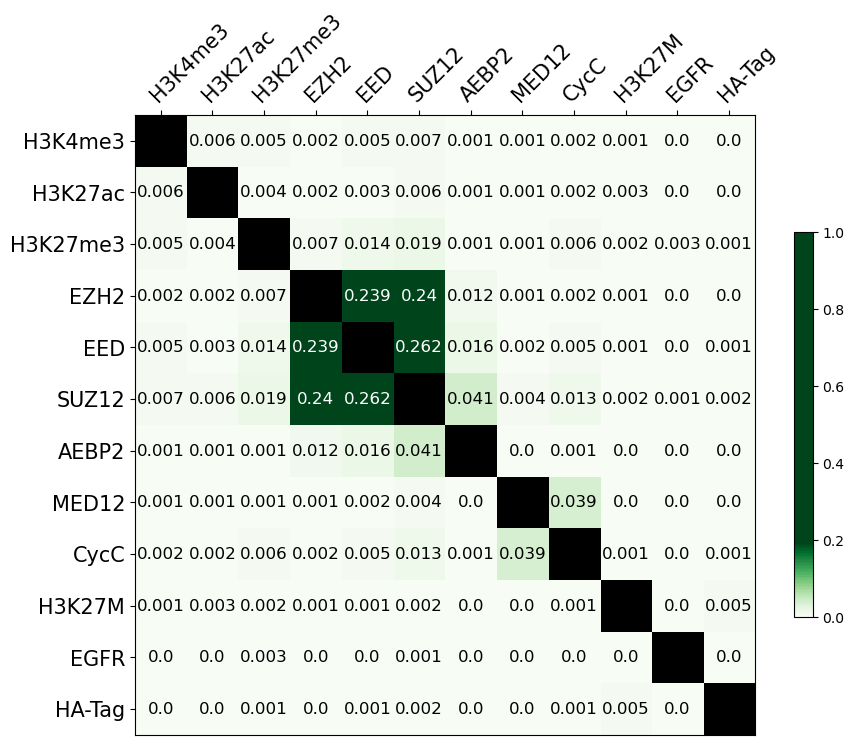

In [6]:
HEKWT_props = UMI_cnts_signal[0]
HEKWT_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    HEKWT_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        HEKWT_mat[i][j] = (HEKWT_props[linear_idx]) / sum(HEKWT_props)
        HEKWT_mat[j][i] = (HEKWT_props[linear_idx]) / sum(HEKWT_props)
        linear_idx += 1

fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(HEKWT_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((HEKWT_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("HEK_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


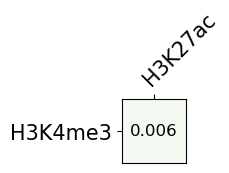

In [7]:
fig, ax = plt.subplots(figsize = (10/12, 10/12))

im = ax.imshow([[x[1]] for x in HEKWT_mat[0:1]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(1))
ax.set_xticklabels([bc_nms[1]])
ax.set_yticklabels([bc_nms[0]])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [1]:
    for j in [0]:
        curr_val = round((HEKWT_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 1, j, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("HEKWT_K4K27_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


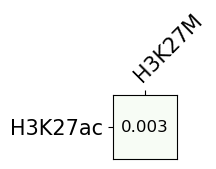

In [8]:
fig, ax = plt.subplots(figsize = (10/12, 10/12))

im = ax.imshow([[x[9]] for x in HEKWT_mat[1:2]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(1))
ax.set_xticklabels([bc_nms[9]])
ax.set_yticklabels([bc_nms[1]])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [9]:
    for j in [1]:
        curr_val = round((HEKWT_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 9, j - 1, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("HEKWT_K27MK27ac_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


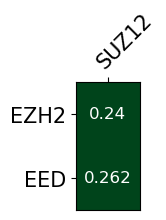

In [9]:
fig, ax = plt.subplots(figsize = (10/12, 10/6))

im = ax.imshow([[x[5]] for x in HEKWT_mat[3:5]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(2))
ax.set_xticklabels([bc_nms[5]])
ax.set_yticklabels(bc_nms[3:5])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [5]:
    for j in [3, 4]:
        curr_val = round((HEKWT_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 5, j - 3, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("HEKWT_PRC2_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

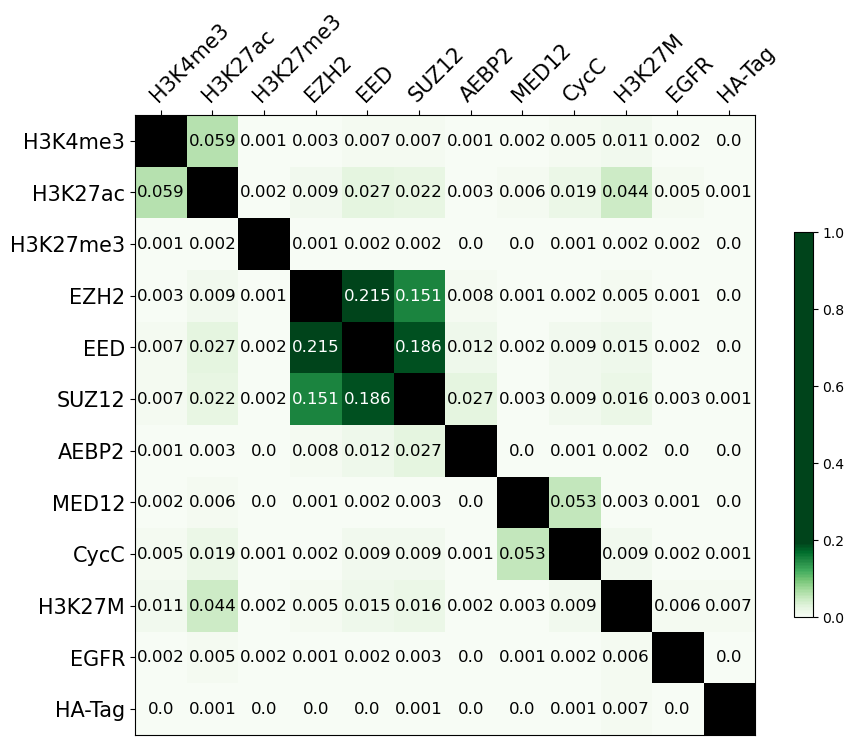

In [10]:
DIPG_props = UMI_cnts_signal[3]
DIPG_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    DIPG_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        DIPG_mat[i][j] = (DIPG_props[linear_idx]) / sum(DIPG_props)
        DIPG_mat[j][i] = (DIPG_props[linear_idx]) / sum(DIPG_props)
        linear_idx += 1
    
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(DIPG_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((DIPG_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("Glioma_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


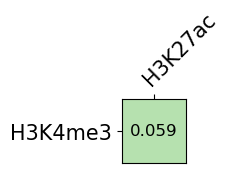

In [11]:
fig, ax = plt.subplots(figsize = (10/12, 10/12))

im = ax.imshow([[x[1]] for x in DIPG_mat[0:1]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(1))
ax.set_xticklabels([bc_nms[1]])
ax.set_yticklabels([bc_nms[0]])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [1]:
    for j in [0]:
        curr_val = round((DIPG_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 1, j, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("Glioma_K4K27_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


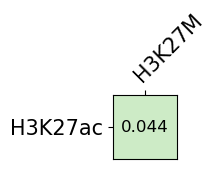

In [12]:
fig, ax = plt.subplots(figsize = (10/12, 10/12))

im = ax.imshow([[x[9]] for x in DIPG_mat[1:2]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(1))
ax.set_xticklabels([bc_nms[9]])
ax.set_yticklabels([bc_nms[1]])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [9]:
    for j in [1]:
        curr_val = round((DIPG_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 9, j - 1, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("Glioma_K27MK27ac_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


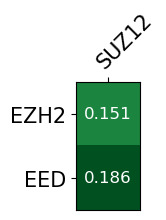

In [13]:
fig, ax = plt.subplots(figsize = (10/12, 10/6))

im = ax.imshow([[x[5]] for x in DIPG_mat[3:5]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(1))
ax.set_yticks(np.arange(2))
ax.set_xticklabels([bc_nms[5]])
ax.set_yticklabels(bc_nms[3:5])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [5]:
    for j in [3, 4]:
        curr_val = round((DIPG_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(i - 5, j - 3, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("Glioma_PRC2_zoomin.svg", dpi = 1200)